# PES of Hydrogen Molecule With Various IBMQ Noise and Mitiq Collate Results

Here we combined the results from notebooks 3_1B and 3_1C.

In [2]:
# Native Lib
import itertools as it
import json
import time

# External Lib
import qiskit
import numpy as np
import pennylane as qml
from pennylane import numpy as plnp
import matplotlib.pyplot as plt
from qiskit.providers.aer.noise import NoiseModel
from mitiq.zne.scaling import fold_global
from mitiq.zne import execute_with_zne

# qanything Lib
import qanything.common_functions as cf
import qanything.get_index as getind
import qanything.get_molecule as getmol
import qanything.get_json as getjson

In [27]:
# Start IBMQ
qiskit.IBMQ.load_account()
# # Get a list of backends
# backend_list = []
# for b in provider.backends():
#     backend_list.append(b.name())

# Filtered Backend List
backend_list = ['ibmq_montreal',
                'ibmq_toronto',
                'ibmq_santiago',
                'ibmq_bogota',
                'ibmq_casablanca',
                'ibmq_mumbai',
                'ibmq_lima',
                'ibmq_belem',
                'ibmq_quito',
                'ibmq_guadalupe',
                'ibmq_brooklyn',
                'ibmq_jakarta',
                'ibmq_manila',
                'ibm_hanoi',
                'ibm_lagos',
                'ibm_cairo',
                'ibm_auckland',
                'ibm_perth',
                'ibm_washington']

In [4]:
# Load Results from Geometry Optimisation Hydrogen
h2_opt_data_filename = 'h2_morse_vqe.json'
h2_opt_data = getjson.load_from_json(h2_opt_data_filename)

Loading Data from: h2_morse_vqe.json


In [5]:

# save_data = {**h2_opt_data}
# save_data['ibm_devices'] = backend_list
# save_data['noisy_backend_noisy_energy'] = noisy_backend_noisy_morse
# save_data['mitig_noisy_backend_noisy_energy'] = mitig_noisy_backend_noisy_morse

filename_noise = 'mitig_noisy_h2.json'
mitig_data = getjson.load_from_json(filename_noise)
backend_list = mitig_data['ibm_devices']
noisy_backend_noisy_morse = mitig_data['noisy_backend_noisy_energy']
mitig_noisy_backend_noisy_morse = mitig_data['mitig_noisy_backend_noisy_energy']

filename_noise_hf = 'mitig_noisy_h2_hf.json'
mitig_hf_data = getjson.load_from_json(filename_noise_hf)
noisy_hf_backend_noisy_morse = mitig_hf_data['noisy_backend_noisy_energy']
mitig_noisy_hf_backend_noisy_morse = mitig_hf_data['mitig_noisy_backend_noisy_energy']

Loading Data from: mitig_noisy_h2.json
Loading Data from: mitig_noisy_h2_hf.json


### Combined Results 

Legend: 
- FCI: Full Configuration Interaction (A Technical Term that describes the electronic energy obtained using the an ansatz that includes all possible electronic configurations, ie. in this case it is Our Disentangled UCC Ansatz)
- HF: Hartree-Fock State
- NZE: Zero Noise Extrapolation

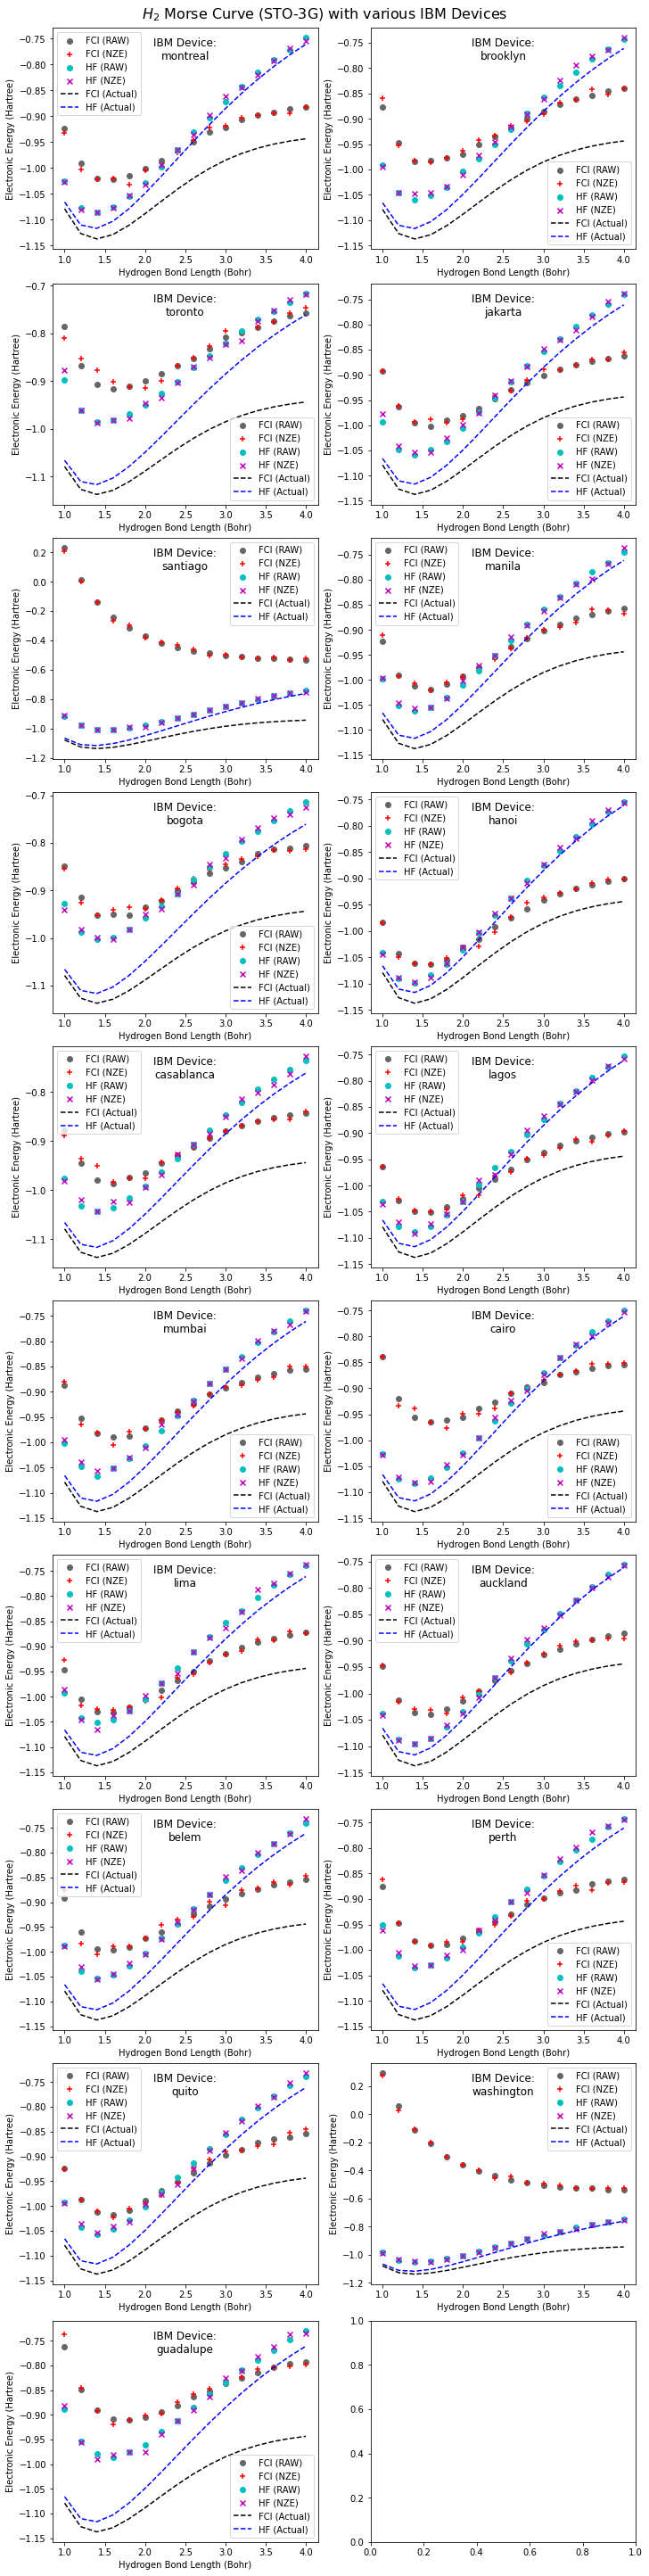

In [25]:
fig, ax = plt.subplots(10, 2, figsize=(10,40), constrained_layout=True)
fig.suptitle(r"$H_2$ Morse Curve (STO-3G) with various IBM Devices", fontsize=16)
for i in range(2):
    for j in range(10):
        if not((i==1) and (j==9)):
            device_name = 'IBM Device:\n' + backend_list[i*10+j].split("_")[1]
            fci_name = "FCI (RAW)"
            fci_nze_name = "FCI (NZE)"
            hf_name = "HF (RAW)"
            hf_nze_name = "HF (NZE)"
            ax[j][i].scatter(h2_opt_data['bond_length'], noisy_backend_noisy_morse[i*10+j], label=fci_name, color='0.4', )
            ax[j][i].scatter(h2_opt_data['bond_length'], mitig_noisy_backend_noisy_morse[i*10+j], label=fci_nze_name, color='r',marker='+')
            ax[j][i].scatter(h2_opt_data['bond_length'], noisy_hf_backend_noisy_morse[i*10+j], label=hf_name, color='c')
            ax[j][i].scatter(h2_opt_data['bond_length'], mitig_noisy_hf_backend_noisy_morse[i*10+j], label=hf_nze_name, color='m',marker='x')
            ax[j][i].text(0.5,0.9,device_name,transform=ax[j][i].transAxes, fontsize=12, horizontalalignment='center', verticalalignment='center')
            ax[j][i].plot(h2_opt_data['bond_length'], h2_opt_data['fci_ref_energy'], label="FCI (Actual)", color='k', ls='--')
            ax[j][i].plot(h2_opt_data['bond_length'], h2_opt_data['hf_ref_energy'], label="HF (Actual)", color='b', ls='--')
            ax[j][i].set_xlabel('Hydrogen Bond Length (Bohr)')
            ax[j][i].set_ylabel('Electronic Energy (Hartree)')
            ax[j][i].legend()

fig.savefig('h2_morse_noisy_and_mitig_combined.png',format='png')
